In [ ]:
'''# Перед началом работы с библиотеками pandas и seaborn необходимо установить их в Python.
# Сделать это можно, исполнив данную ячейку
!pip3 install pandas
!pip3 install seaborn'''

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
# Настройка, которая позволяет сделать графики, которые рисует seaborn, более крупными
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [8]:
def round_to_2(x):
    """
    Принимает число и возвращает результат его округления
    до 2 знаков после запятой.
    
    Аргументы:
        x: Число.
        
    Возвращаемое значение:
        Результат округления числа до 2 знаков после запятой.
    """
    
    return round(x, 2)

## Среднее значение в колонке csv-файла

In [4]:
def split_line(line, sep):
    """
    Возвращает список значений, которые содержатся в строке
    и разделены конкретным разделителем.
    Если какое-то из значений обособлено кавычками ("<значение>"), то разделительный
    символ внутри него не считается разделителем.
    
    Например, если передать в функцию строку 'aa,bb,"cc, oo",dd' и разделитель ',',
    то в результате работы функции получится список ['aa', 'bb', 'cc, oo', 'dd'].
    
    Аргументы:
        line: Строка, которую нужно разбить на подстроки.
        sep: Разделитель, который используется в строке для отделения различных значений.
        
    Возвращаемое значение:
        Список подстрок строки, получаемых с помощью разделения её
        на подстроки по заданному разделителю.
    """
    
    res = []
    
    prev_ind = -1
    in_quotes = False
    
    for i in range(len(line)):
        ch = line[i]
        
        if ch == '"':
            in_quotes = not in_quotes
            
        if not in_quotes and ch == sep:
            res.append(line[prev_ind + 1:i].strip('"'))
            prev_ind = i
            
    if prev_ind < len(line) - 1:
        res.append(line[prev_ind + 1:len(line)].strip('"'))
    elif prev_ind == len(line) - 1:
        res.append('')
    
    return res

In [9]:
def read_csv_and_calc_mean_solution(lines, sep, column_name):
    """
    Принимает список строк из csv-файла и возвращает среднее значение в заданной колонке.
    В первой строке csv-файла всегда представлены названия его колонок.
    
    Аргументы:
        lines: Список строк, прочитанных из csv-файла.
        sep: Разделитель, который используется в строках для отделения различных значений.
        column_name: Название колонки с целочисленными значениями, по которой нужно посчитать среднее.
        
    Возвращаемое значение:
        Среднее значение в заданной колонке, округлённое до 2 знаков
        после запятой с помощью функции round_to_2.
    """
    
    idx = split_line(lines[0], sep).index(column_name)
    
    sm = 0
    for i in range (1, len(lines)):
        sm += int(split_line(lines[i], sep)[idx])
    
    return round_to_2(sm / (len(lines) - 1))

In [10]:
def read_csv_and_calc_mean_tests():
    example_1_lines = [
        'Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства',
        'Боевик,0,36,Италия,1996',
        'Комедия,1,23,Россия,1999',
        'Триллер,2,21,США,2006',
    ]
    example_1_sep = ','
    example_1_column = 'Год производства'
    example_1_res = 2000.33
    
    assert read_csv_and_calc_mean_solution(example_1_lines, example_1_sep, example_1_column) == example_1_res
    
    example_2_lines = [
        'Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства',
        'Боевик,0,36,Италия,1996',
        'Комедия,1,23,Россия,1999',
        'Триллер,2,21,США,2006',
        'Комедия,1,48,США-Россия,2012',
        'Драма,2,3,Франция,2016',
        'Документальный,2,47,Германия,2001'
    ]
    example_2_sep = ','
    example_2_column = 'Продолжительность, минуты'
    example_2_res = 29.67
    
    assert read_csv_and_calc_mean_solution(example_2_lines, example_2_sep, example_2_column) == example_2_res
    
    print('Все тесты прошли успешно!')

In [11]:
read_csv_and_calc_mean_tests()

Все тесты прошли успешно!


## Фильтрация таблиц

In [13]:
# В переменную movies загружена таблица из файла movies_data.csv
movies = pd.read_csv('movies_data.csv', sep=',')
movies.sample(10) ##

,Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства
7248,Триллер,2,31,США,2012.0
571,Триллер,нет данных,9,США,2020.0
437,Боевик,1,31,США,2006.0
9841,Триллер,63,7,Франция-Италия,2010.0
8533,Драма,1,35,Германия,2008.0
7263,Комедия,1,50,Германия,2014.0
4490,Триллер,0,52,Россия,2006.0
8677,Документальный,1,0,Россия,NaN
8170,Документальный,12,19,Франция,2009.0
7878,Драма,1,1,Россия,2018.0


In [15]:
##
movies.describe()

,"Продолжительность, минуты",Год производства
count,10000.000000,9008.000000
mean,31.127200,2009.468250
std,18.967419,5.052812
min,0.000000,1991.000000
25%,18.000000,2006.000000
50%,30.000000,2009.000000
75%,44.000000,2013.000000
max,490.000000,2029.000000


In [16]:
# Удаление фильмов, у которых не указан год производства
movies = movies[~movies['Год производства'].isna()]

In [17]:
##
movies.describe()

,"Продолжительность, минуты",Год производства
count,9008.000000,9008.000000
mean,31.127331,2009.468250
std,19.173904,5.052812
min,0.000000,1991.000000
25%,18.000000,2006.000000
50%,30.000000,2009.000000
75%,44.000000,2013.000000
max,490.000000,2029.000000


In [19]:
##
movies.describe(include=np.object)

,Жанр,"Продолжительность, часы",Страна производства
count,9008,9008,9008
unique,5,52,11
top,Боевик,1,Россия
freq,2761,4656,3273


# 2a
Сколько драм, единственной страной производства которых является Франция, представлено в таблице?

Чтобы узнать число строчек в таблице, воспользуйтесь функцией len. Например, если в переменной french_dramas находится таблица, полученная в результате применения к таблице фильтрации, то число фильмов в таблице можно оценить как len(french_dramas).

In [20]:
movies.head()

,Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства
0,Драма,35,42,Италия,2008.0
1,Драма,1,16,Италия,2007.0
2,Документальный,1,45,США,2005.0
3,Драма,нет данных,42,Германия,2009.0
4,Комедия,1,43,Франция,2009.0


In [25]:
movies[(movies['Жанр'] == 'Драма') & (movies['Страна производства'] == 'Франция')].shape[0]

235

# 2b
Сколько фильмов, единственной страной производства которых является Россия и которые были выпущены после 2010 года, представлено в таблице?

In [26]:
movies[(movies['Год производства'] > 2010) & (movies['Страна производства'] == 'Россия')].shape[0]

1312

# 2c
Сколько в таблице представлено фильмов, удовлетворяющих хотя бы одному из следующих условий:

Единственной страной производства фильма является Россия.
Фильм является триллером, выпущенным до 2000 года.

In [30]:
movies[(movies['Страна производства'] == 'Россия') 
       | ((movies['Год производства'] < 2000)
           & (movies['Жанр'] == 'Триллер'))].shape[0]

3299

## Комбинирование колонок и расчёт статистик

In [3]:
# В переменную movies_budget загружена таблица из файла movies_budget.csv
movies_budget = pd.read_csv('movies_budget.csv', sep=';')

In [4]:
movies_budget.sample(10)

,Жанр,Страна производства,Бюджет,Число зрителей,Стоимость билета
921,Драма,США-Германия,698097,509892,350
91,Боевик,США,5666939,111021,350
899,Комедия,США-Германия,1254927,75456,350
540,Драма,США,4082133,493693,220
746,Боевик,Германия,1014943,68308,220
867,Комедия,Франция-Италия,1021141,82862,350
40,Драма,Франция,1470047,376313,350
987,Комедия,Франция,882033,105038,220
727,Драма,Германия,952564,352725,400
161,Драма,США,5336422,473250,350


In [5]:
##
movies_budget.describe()

,Бюджет,Число зрителей,Стоимость билета
count,1.000000e+03,1000.000000,1000.000000
mean,2.516648e+06,215929.951000,310.930000
std,1.827117e+06,189440.120758,73.075133
min,4.203970e+05,29426.000000,150.000000
25%,1.030318e+06,89599.250000,220.000000
50%,1.848334e+06,114423.500000,350.000000
75%,4.149303e+06,385214.250000,350.000000
max,8.583665e+06,786474.000000,400.000000


In [6]:
##
movies_budget.describe(include=np.object)

,Жанр,Страна производства
count,1000,1000
unique,5,11
top,Триллер,Россия
freq,305,331


# 3a
Рассчитайте среднее значение дохода от продажи билетов на фильмы, которые представлены в таблице. Для конкретного фильма доход от продажи билетов рассчитывается так:  
доход=стоимость билета⋅число зрителей.  
Ответ округлите до двух знаков после запятой с помощью функции round_to_2, реализованной в блокноте.

In [12]:
revenue = movies_budget['Число зрителей'] * movies_budget['Стоимость билета']
round_to_2(revenue.mean())

67278893.76

# 3b
Рассчитайте максимальное значение прибыли для фильмов, представленных в таблице. Для конкретного фильма прибыль рассчитывается так:  
прибыль = 1/2 ⋅ доход от продажи билетов − бюджет − расходы на рекламу,  
где доход от продажи билетов вы научились вычислять в предыдущем задании, а расходы на рекламу — это половина бюджета фильма.  
Ответ округлите до двух знаков после запятой с помощью функции round_to_2, реализованной в блокноте.

In [17]:
profit = 0.5 * revenue -  1.5 * movies_budget['Бюджет']
round_to_2(profit.max())

150431902.0

## Агрегированные статистики

In [ ]:
# В переменную movies_budget загружена таблица из файла movies_budget.csv
movies_budget = pd.read_csv('movies_budget.csv', sep=';')

In [25]:
def transform_countries_info(movies_data):
    """
    Принимает таблицу с колонкой «Страна производства» и добавляет к таблице 5 новых колонок:
    по одной на каждую отдельную страну. Значение в каждой из колонок соответствует тому,
    принимала ли конкретная страна участие в производстве фильма.
    
    Аргументы:
        movies_data: Исходная таблица с клонкой «Страна производства».
        
    Возвращаемое значение:
        Нет. Функция модифицирует переданную таблицу, но ничего не возвращает.
    """
    
    countries = ['Россия', 'Германия', 'США', 'Италия', 'Франция']
    new_columns = [[] for i in range(len(countries))]
    
    for _, row in movies_data.iterrows():
        country_of_origin_united = row['Страна производства']
        countries_of_origin = country_of_origin_united.split('-')
        
        for i in range(len(countries)):
            country = countries[i]
            
            if country in countries_of_origin:
                new_columns[i].append('Да')
            else:
                new_columns[i].append('Нет')
                
    for i in range(len(countries)):
        movies_data[countries[i]] = new_columns[i]

# 4a
С помощью группировки и агрегации постройте топ жанров по суммарному числу зрителей соответствующих фильмов и заполните таблицу. Жанры в таблице должны быть расположены по убыванию суммарного числа зрителей.

In [24]:
movies_budget.groupby('Жанр').agg({'Число зрителей': sum}).sort_values('Число зрителей', ascending=False)

,Число зрителей
Жанр,
Драма,144536483
Триллер,30519114
Боевик,20859969
Документальный,10093471
Комедия,9920914


# 4b
Используя функцию transform_countries_info, постройте с помощью фильтрации, группировки и агрегации топ жанров по числу фильмов, которые производились в России или при участии России. Жанры в топе должны быть расположены по убыванию числа фильмов.

In [26]:
transform_countries_info(movies_budget)
movies_budget.head()

,Жанр,Страна производства,Бюджет,Число зрителей,Стоимость билета,Россия,Германия,США,Италия,Франция
0,Драма,США,5932617,465141,350,Нет,Нет,Да,Нет,Нет
1,Триллер,Германия,1007872,141702,220,Нет,Да,Нет,Нет,Нет
2,Триллер,Франция,1277422,114760,350,Нет,Нет,Нет,Нет,Да
3,Комедия,Россия-Франция,880262,71666,400,Да,Нет,Нет,Нет,Да
4,Боевик,Россия,2114068,96311,400,Да,Нет,Нет,Нет,Нет


In [36]:
movies_budget[movies_budget['Россия']=='Да'].groupby('Жанр').agg({'Россия': 'count'}).sort_values('Россия', ascending=False)

,Россия
Жанр,
Драма,123
Триллер,111
Боевик,77
Документальный,40
Комедия,33


In [18]:
movies_budget.head()

,Жанр,Страна производства,Бюджет,Число зрителей,Стоимость билета
0,Драма,США,5932617,465141,350
1,Триллер,Германия,1007872,141702,220
2,Триллер,Франция,1277422,114760,350
3,Комедия,Россия-Франция,880262,71666,400
4,Боевик,Россия,2114068,96311,400


## Визуальный анализ данных

In [37]:
# В переменную many_factors загружена таблица из файла many_factors_data.csv
many_factors = pd.read_csv('many_factors_data.csv')

In [38]:
##
many_factors.sample(10)

,A,B,C,D,E
784,-0.193120,0.037295,-0.022793,-0.022795,0.150973
859,-0.587073,0.344654,0.171012,0.171857,0.413536
809,0.670603,0.449708,0.163039,0.163770,0.403781
716,-0.910524,0.829053,0.016829,0.016830,0.129726
54,0.314463,0.098887,0.082648,0.082743,0.287486
880,-0.684055,0.467931,-0.102319,-0.102498,0.319873
142,0.685167,0.469454,0.208089,0.209621,0.456168
439,-0.886077,0.785132,0.345600,0.352878,0.587877
777,-0.959433,0.920512,0.348062,0.355504,0.589968
133,0.710608,0.504964,0.179129,0.180101,0.423237


# 5a
С помощью визуального анализа определите, какие факторы зависят друг от друга. Если оказалось, что фактор «X» зависит от фактора «Y», то фактор «X» в левой колонке нужно соединить с фактором «Y» в правой колонке, а фактор «Y» в левой колонке — с фактором «X» в правой.

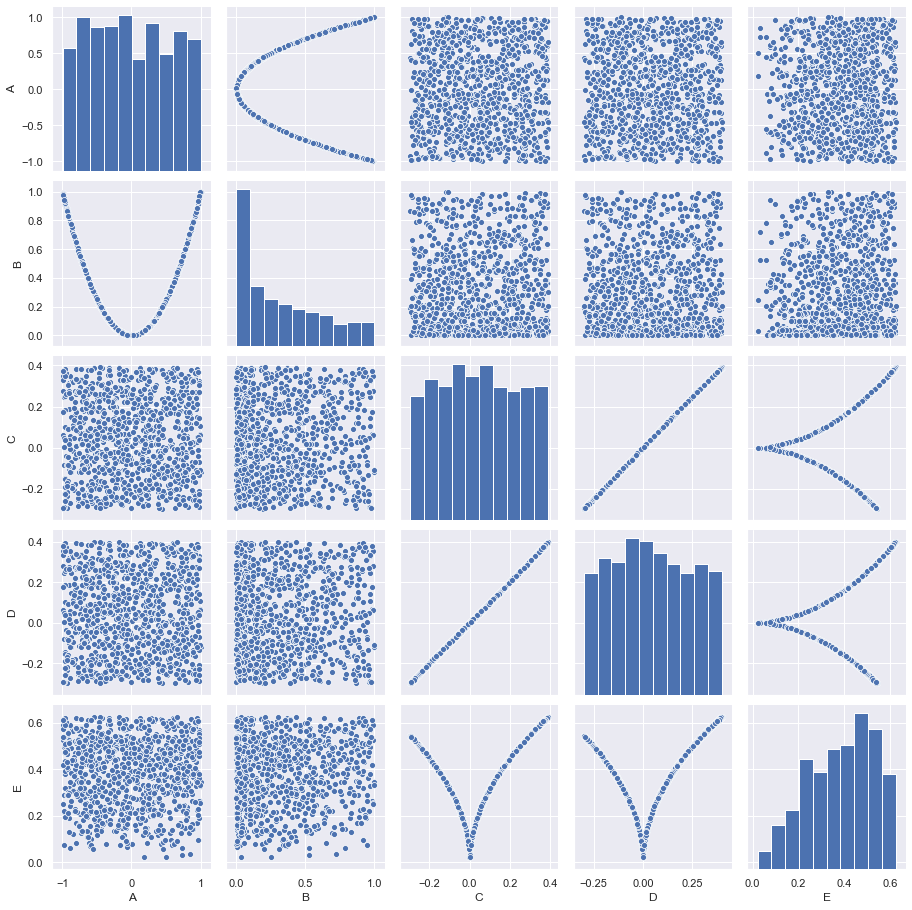

In [39]:
sns.pairplot(many_factors)

In [40]:
# В переменную uniform_and_not загружена таблица из файла uniform_and_not_data
uniform_and_not = pd.read_csv('uniform_and_not_data.csv')

In [42]:
##
uniform_and_not.sample(10)

,A,B,C,D,E
57,0.791223,2.820437,-2.805137,-0.183097,0.838440
567,0.016661,5.612203,-5.533745,-1.206152,0.591862
517,-0.481063,3.643020,-2.600293,0.269339,0.846410
492,-0.054346,5.056521,-3.143682,-0.359051,0.422867
928,-0.780833,4.135758,7.862488,0.116760,0.216604
860,0.872254,4.442265,-1.390673,1.483178,0.079620
520,0.185490,7.299294,2.653789,-1.479661,0.157999
729,-0.157626,3.673428,-7.588633,-0.654674,0.743059
703,-0.215707,0.432847,3.892030,-0.428694,0.036120
495,-0.271487,16.056681,-2.922268,-0.480654,0.000317


# 5b
Определите, какие факторы в данных имеют распределение, которое отличается от равномерного.

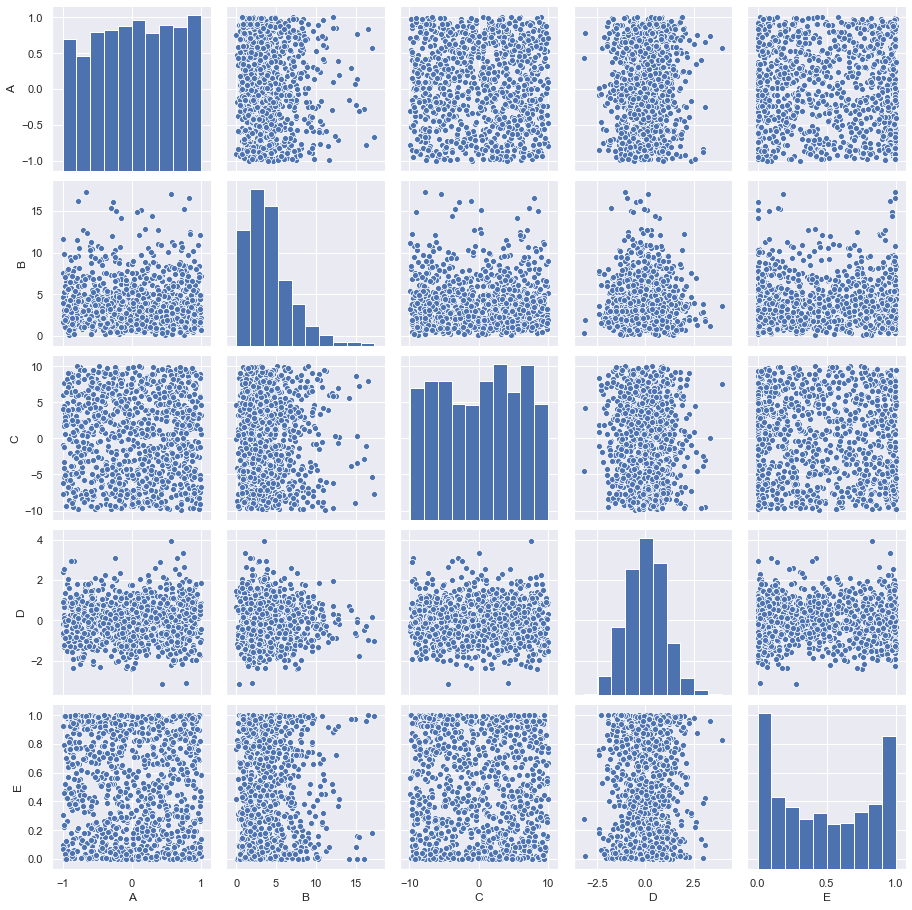

In [44]:
sns.pairplot(uniform_and_not);